In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget "/content/drive/MyDrive/Dataset 1"
!unzip -qo Dataset 1
!rm dataset 1 .zip



/content/drive/MyDrive/Dataset 1: Scheme missing.
unzip:  cannot find or open Dataset, Dataset.zip or Dataset.ZIP.
rm: cannot remove 'dataset': No such file or directory
rm: cannot remove '1': No such file or directory
rm: cannot remove '.zip': No such file or directory


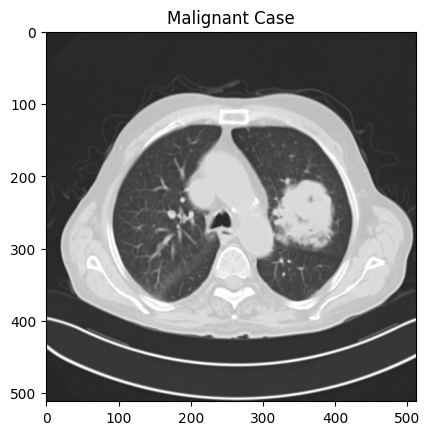

In [ ]:

img = cv2.imread("/content/drive/MyDrive/Dataset 1/Train/Malignant cases/Malignant case (10).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [ ]:
# Define image dimensions
img_width = 150
img_height = 150

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.1)

# Create data generators for training and validation sets
train_data_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Dataset 1/Train",
    target_size=(img_width, img_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=16,
    subset="training",
    shuffle=True
)

validation_data_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Dataset 1/Train",
    target_size=(img_width, img_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=16,
    subset="validation"
)


Found 970 images belonging to 3 classes.
Found 107 images belonging to 3 classes.


In [ ]:
, test
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)
test_data_generator = datagen.flow_from_directory(directory="/content/drive/MyDrive/Dataset 1/Test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 16, subset = "training", shuffle="True")
validation_data_generator = datagen.flow_from_directory(directory="/content/drive/MyDrive/Dataset 1/Test", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 16,subset = "validation")


Found 20 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [ ]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32,activation="relu"))


model.add(Dense(3, activation="softmax"))

In [ ]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=12, validation_data=validation_data_generator, validation_steps = len(validation_data_generator),callbacks=my_callback)

Epoch 1/12
61/61 [==============================] - ETA: 0s - loss: 0.5659 - accuracy: 0.5278

61/61 [==============================] - 138s 2s/step - loss: 0.5659 - accuracy: 0.5278
Epoch 2/12
61/61 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.6515

61/61 [==============================] - 20s 327ms/step - loss: 0.4501 - accuracy: 0.6515
Epoch 3/12
61/61 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.8052

61/61 [==============================] - 19s 308ms/step - loss: 0.3009 - accuracy: 0.8052
Epoch 4/12
61/61 [==============================] - ETA: 0s - loss: 0.2122 - accuracy: 0.8691

61/61 [==============================] - 20s 328ms/step - loss: 0.2122 - accuracy: 0.8691
Epoch 5/12
61/61 [==============================] - ETA: 0s - loss: 0.1583 - accuracy: 0.8897

61/61 [==============================] - 19s 312ms/step - loss: 0.1583 - accuracy: 0.8897
Epoch 6/12
61/61 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9381

61/61 [==============================] - 20s 330ms/step - loss: 0.1117 - accuracy: 0.9381
Epoch 7/12
61/61 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9639

61/61 [==============================] - 19s 312ms/step - loss: 0.0648 - accuracy: 0.9639
Epoch 8/12
61/61 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9814

61/61 [==============================] - 20s 332ms/step - loss: 0.0384 - accuracy: 0.9814
Epoch 9/12
61/61 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9856

61/61 [==============================] - 19s 305ms/step - loss: 0.0248 - accuracy: 0.9856
Epoch 10/12
61/61 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9928

61/61 [==============================] - 20s 331ms/step - loss: 0.0105 - accuracy: 0.9928
Epoch 11/12
61/61 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9887

61/61 [==============================] - 19s 306ms/step - loss: 0.0211 - accuracy: 0.9887
Epoch 12/12
61/61 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9948

61/61 [==============================] - 20s 320ms/step - loss: 0.0079 - accuracy: 0.9948


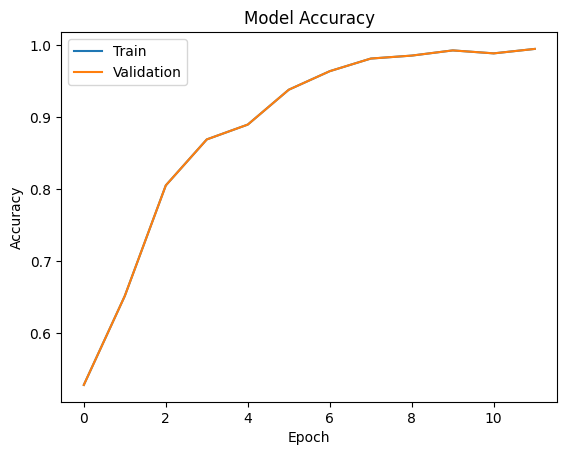

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a 'history' object with training history

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


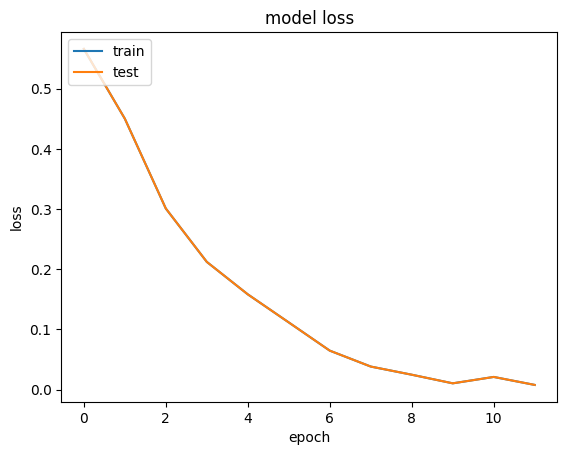

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x, y = test_data_generator.next()

# Assuming you have already defined the 'model'
# If not, make sure you define and load your model before using it

test_path = "/content/drive/MyDrive/Dataset 1/Test"  # Correct the path to your test data directory

pred_array = []
max_index_arr = []

for i in range(5):
    img = x[i]
    img = img.reshape(-1, img_width, img_height, 1)  # Use img_width and img_height instead of 5
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)
    max_index_arr.append(pred_val)

print("Predicted Labels:", pred_array)
print("Predicted Probabilities:", max_index_arr)


1/1 [==============================] - 0s 20ms/step
Predicted Labels: [1, 2, 1, 1, 1]
Predicted Probabilities: [array([[2.4342135e-06, 9.9999356e-01, 4.0505029e-06]], dtype=float32), array([[4.1221934e-08, 1.4594485e-09, 1.0000000e+00]], dtype=float32), array([[1.1165699e-02, 9.8881966e-01, 1.4620405e-05]], dtype=float32), array([[2.0828649e-10, 1.0000000e+00, 4.8338569e-09]], dtype=float32), array([[5.7356134e-11, 1.0000000e+00, 1.5735302e-11]], dtype=float32)]


In [ ]:
from sklearn.metrics import confusion_matrix
# Assuming you have already defined validation_data_generator and model

# Load the validation data
validation_data_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Dataset 1/Train",
    target_size=(img_width, img_height),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=16,
    subset="validation"
)

# Get true labels (Y_val)
Y_val = validation_data_generator.classes

# Ensure that the validation data generator has data
if len(validation_data_generator) == 0:
    print("Validation data generator has no data.")
else:
    # Generate predictions for validation data
    Y_pred = model.predict(validation_data_generator)

    # Convert predicted probabilities to class labels (Y_pred)
    Y_pred = np.argmax(Y_pred, axis=1)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(Y_val, Y_pred)

    print("Confusion Matrix:")
    print(confusion_mat)


Found 107 images belonging to 3 classes.
7/7 [==============================] - 14s 2s/step
Confusion Matrix:
[[ 1  6  4]
 [13 21 21]
 [10 17 14]]


In [ ]:
cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:5]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1

print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Malignant', 1: 'Normal', 2: 'Benign', 3: 'Malignant', 4: 'Benign'}
PREDICTIONS: {0: 'Malignant', 1: 'Normal', 2: 'Malignant', 3: 'Malignant', 4: 'Malignant'}


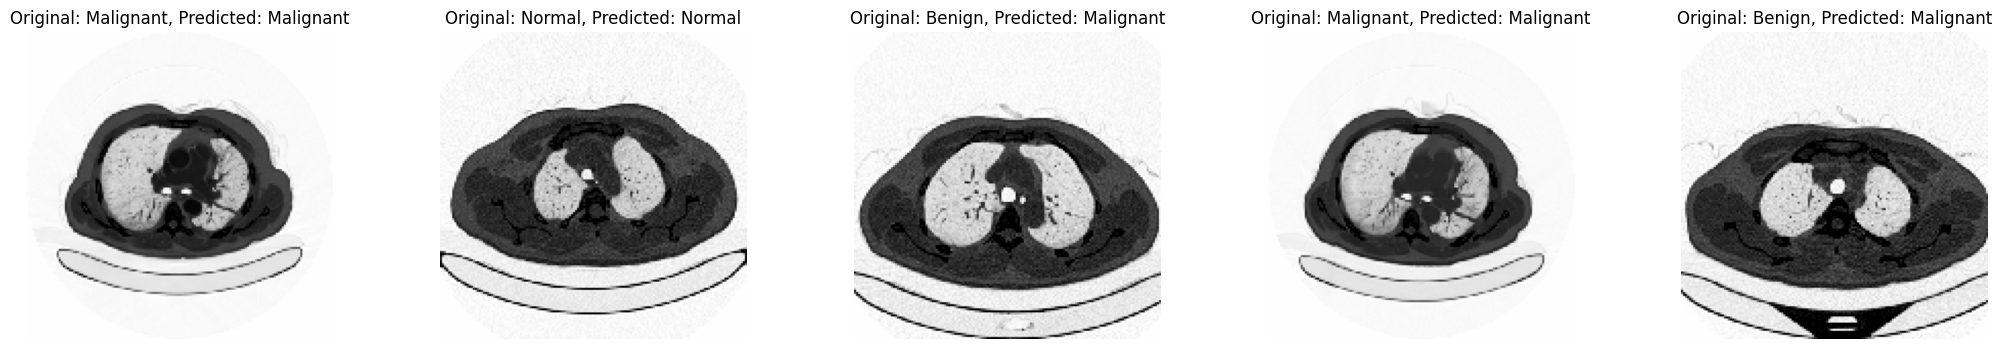

In [ ]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i], cmap="binary")
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()